In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [4]:
fdf = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\data_member.csv", index_col=0) # for Windows
# fdf = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/data member.csv', index_col=0) # for MacOS

fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 27.0+ MB


In [5]:
## FOR Windows
t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

## FOR Mac
# t21_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2021.csv', index_col=0)
# t22_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2022.csv', index_col=0)
# t23_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2023.csv', index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


In [6]:
## for Windows

ff = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2021.csv', index_col=0)
ff1 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2022.csv', index_col=0)
ff2 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2023.csv', index_col=0)

## for MacOS

# ff = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2021.csv', index_col=0)
# ff1 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2022.csv', index_col=0)
# ff2 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2023.csv', index_col=0)

o_df = pd.concat([ff,ff1,ff2])
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406316 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   product_json       object 
 4   total_amount       float64
 5   discount           float64
 6   paid_amount        int64  
 7   trans_origin_type  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 165.2+ MB


# STEP 1
- Clean DATA

In [7]:
fdf['join'] = pd.to_datetime(fdf['join_year'].astype(str) + '/' + fdf['join_month'].astype(str) + '/01')
fdf = fdf.loc[:,['ent','original_status','sponsor','join']]
fdf['mem_duration(months)'] = round((dt.datetime(2023, 7, 1)-fdf['join'])/np.timedelta64(1, 'M'))

fdf

,ent,original_status,sponsor,join,mem_duration(months)
0,UCC4CC4F,-,8844CQCEY,2014-05-01,110.0
1,UCC4CCEK,-,8844CQCCU,2014-05-01,110.0
2,UCC4CC15,-,8844CQCEY,2014-05-01,110.0
3,UCC4CCR2,-,8844CQCEY,2014-05-01,110.0
4,UCC4CCJP,-,8844CQCEY,2014-05-01,110.0
...,...,...,...,...,...
590560,H3CCC43B,A,H3CCC4R2,2010-07-01,156.0
590561,H3CCC4ZY,A,H3CCC4JP,2010-06-01,157.0
590562,H3CCCEC7,A,H3CCC4JP,2010-07-01,156.0
590563,H3CCCE4I,A,H3CCC4JP,2010-07-01,156.0


In [8]:
# Change Date format
tall_df['payment_date'] = pd.to_datetime(tall_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
tall_df['payment_date'] = pd.to_datetime( tall_df['payment_date'].dt.to_period('M').astype(str) )

o_df['payment_date'] = pd.to_datetime(o_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
o_df['payment_date'] = pd.to_datetime( o_df['payment_date'].dt.to_period('M').astype(str) )

tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643124,2023-07-01,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-01,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-01,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643127,2023-07-01,TCCEQEZJQ4F,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1


- Transform

In [9]:
# Prepare Columns

j0 = pd.DataFrame(o_df.groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum()))
j1 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m'})                       
j2 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m'}) 

j3 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='online'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online'}) 
j4 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_online'})
j5 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_online'})

j6 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='offline'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline'})
j7 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_offline'})
j8 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_offline'})

############################################################################################################

j9 = pd.DataFrame(fdf.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                  ).rename(columns={'ent':'total_network'})
j10 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1),['ent']]
j10 = pd.merge(j10, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j10 = pd.DataFrame(j10.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                   ).rename(columns={'ent':'network_last_3m'})

j11 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1),['ent']]
j11 = pd.merge(j11, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j11 = pd.DataFrame(j11.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                   ).rename(columns={'ent':'network_last_6m'})

############################################################################################################

j12 = pd.DataFrame(o_df.groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                   ).rename(columns={'payment_date':'total_transaction'})
j13 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last3m'})
j14 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last6m'})

j15 = pd.DataFrame(tall_df.groupby(by=['ent'])['qty'].apply(lambda x: x.sum())).rename(columns={'qty':'total_qty'})
j16 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last3m'})
j17 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last6m'})

j18 = pd.DataFrame(tall_df.groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_penetrate(%)'})
j18['sku_penetrate(%)'] = round(j18['sku_penetrate(%)']/len(tall_df['product'].unique()),3)
j19 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last3m'})
j19['sku_last3m'] = round(j19['sku_last3m']/len(tall_df['product'].unique()),3)
j20 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last6m'})
j20['sku_last6m'] = round(j20['sku_last6m']/len(tall_df['product'].unique()),3)

In [10]:
# JOIN COLUMN

df = pd.DataFrame(tall_df['ent'].unique()).rename(columns={0:'ent'})
df = pd.merge(df, fdf.loc[:,['ent','mem_duration(months)']] ,how='left' , left_on=['ent'], right_on=['ent'])

tomerge = [j0,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20]

for n,i in enumerate(tomerge) : 
    if 9 <= n <= 11 :
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['sponsor'])
    else : 
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['ent'])

df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,total_qty,qty_last3m,qty_last6m,sku_penetrate(%),sku_last3m,sku_last6m
0,TCC43RQQZ3B,NaN,2037000.0,NaN,NaN,1627000.0,NaN,NaN,410000.0,NaN,...,NaN,2,NaN,NaN,3,NaN,NaN,0.005,NaN,NaN
1,TCC4Q4JZ4Q0,NaN,795500.0,NaN,NaN,793000.0,NaN,NaN,2500.0,NaN,...,NaN,3,NaN,NaN,5,NaN,NaN,0.007,NaN,NaN
2,TCC4RJ11QE7,43.0,31365000.0,NaN,1005000.0,28385000.0,NaN,1005000.0,2980000.0,NaN,...,1.0,23,NaN,1.0,63,NaN,3.0,0.032,NaN,0.002
3,TCC434QRCJY,NaN,341000.0,NaN,NaN,341000.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,0.002,NaN,NaN
4,TCC43RRCE10,NaN,189000.0,NaN,NaN,189000.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,1538000.0,1538000.0,1538000.0,NaN,NaN,NaN,1538000.0,1538000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580820,TCCEQ1Z1QEF,0.0,1538000.0,1538000.0,1538000.0,NaN,NaN,NaN,1538000.0,1538000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580821,TCCEQ1Z1QW0,0.0,1538000.0,1538000.0,1538000.0,NaN,NaN,NaN,1538000.0,1538000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,NaN,NaN,...,NaN,1,1.0,1.0,1,1.0,1.0,0.002,0.002,0.002


In [11]:
df.isna().sum()

ent                           0
mem_duration(months)     205981
total_amount                  0
total_last_3m            531837
total_last_6m            492956
total_online             239197
total_last_3m_online     548628
total_last_6m_online     521431
total_offline            171647
total_last_3m_offline    552479
total_last_6m_offline    527940
total_network            498478
network_last_3m          562046
network_last_6m          553084
total_transaction             0
transaction_last3m       531837
transaction_last6m       492956
total_qty                     0
qty_last3m               531837
qty_last6m               492956
sku_penetrate(%)              0
sku_last3m               531837
sku_last6m               492956
dtype: int64

In [12]:
df['ticket_size'] = round(df['total_amount']/df['total_qty'],3)
df['ticket_size_3m'] = round(df['total_last_3m']/df['qty_last3m'],3)
df['ticket_size_6m'] = round(df['total_last_6m']/df['qty_last6m'],3)

df = df.drop(columns=['total_qty','qty_last3m','qty_last6m'])
df = df.fillna(0)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2,0.0,0.0,0.005,0.000,0.000,679000.000,0.000,0.000
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3,0.0,0.0,0.007,0.000,0.000,159100.000,0.000,0.000
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23,0.0,1.0,0.032,0.000,0.002,497857.143,0.000,335000.000
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,341000.000,0.000,0.000
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,189000.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580820,TCCEQ1Z1QEF,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580821,TCCEQ1Z1QW0,0.0,1538000.0,1538000.0,1538000.0,0.0,0.0,0.0,1538000.0,1538000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,256333.333,256333.333,256333.333
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,0.0,0.0,...,0.0,1,1.0,1.0,0.002,0.002,0.002,498000.000,498000.000,498000.000


In [13]:
def amountvsyr(df):
    # Create a scatter plot
    sns.scatterplot(x='mem_duration(months)', y='total_amount', data=df)

    mean_x = df['mem_duration(months)'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Month')

    # Add legend
    plt.legend()

    plt.xlabel('Month')
    plt.ylabel('Sum Total Amount')
    plt.title('Sum Total Amount VS Duration (Months)')

    # Show the plot
    plt.show()

In [14]:
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_transform_data-with-outlier.csv')

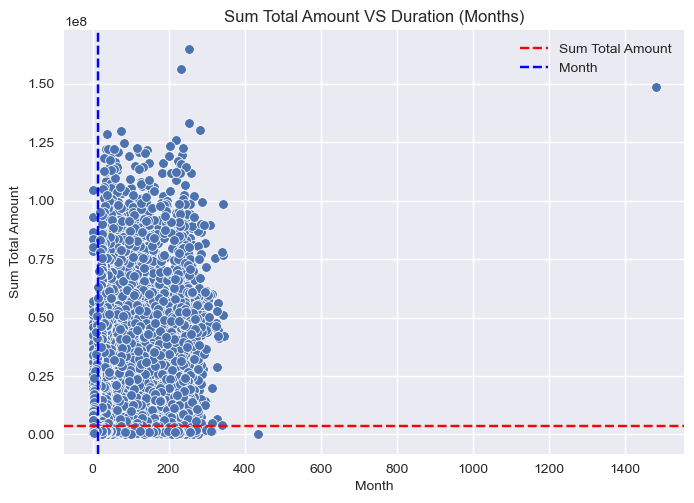

In [15]:
plt.style.use('seaborn-v0_8')

amountvsyr(df)

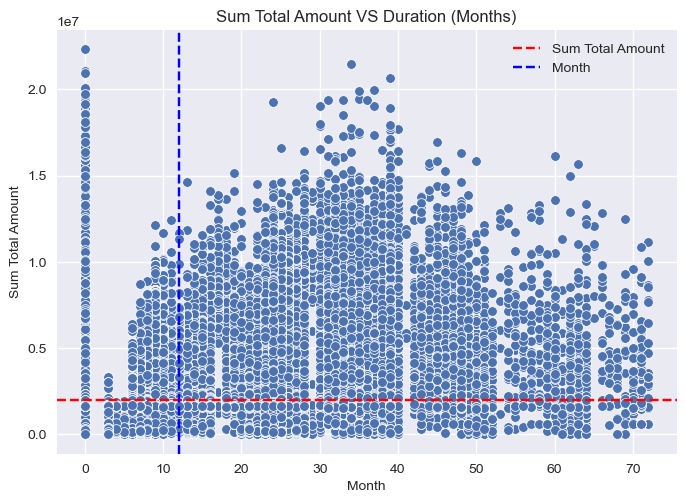

In [16]:
for n,i in enumerate(df.columns):
    if n != 0 :
        q_low = df[i].quantile(0.01)
        q_hi  = df[i].quantile(0.99)

        df2 = df[(df[i] > q_hi)] # Outliers
        df = df[(df[i] <= q_hi)]

amountvsyr(df)

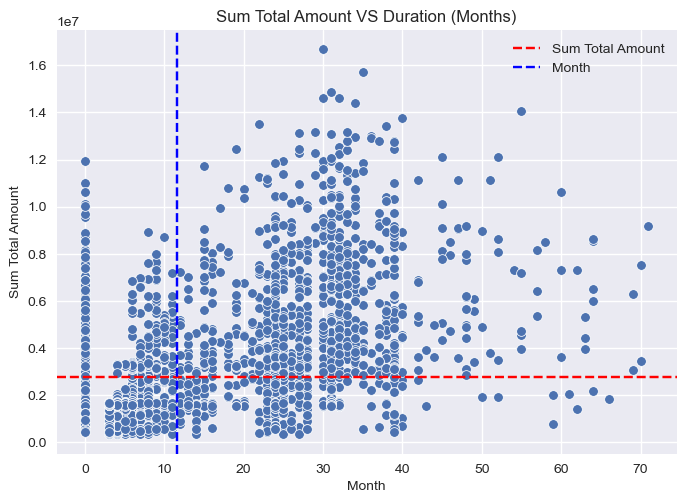

In [17]:
amountvsyr(df2)

In [18]:
df = df.reset_index(drop = True)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2,0.0,0.0,0.005,0.0,0.000,679000.0,0.0,0.0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3,0.0,0.0,0.007,0.0,0.000,159100.0,0.0,0.0
2,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.0,0.000,341000.0,0.0,0.0
3,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.0,0.000,189000.0,0.0,0.0
4,TCC4WQQRE1I,0.0,1459000.0,0.0,0.0,1459000.0,0.0,0.0,0.0,0.0,...,0.0,4,0.0,0.0,0.005,0.0,0.000,291800.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479097,TCCEQ43JRR0,3.0,338000.0,0.0,338000.0,338000.0,0.0,338000.0,0.0,0.0,...,0.0,1,0.0,1.0,0.004,0.0,0.004,169000.0,0.0,169000.0
479098,TCCEQ43QW15,3.0,149000.0,0.0,149000.0,149000.0,0.0,149000.0,0.0,0.0,...,0.0,1,0.0,1.0,0.002,0.0,0.002,149000.0,0.0,149000.0
479099,TCCE4E4EE42,3.0,50000.0,0.0,50000.0,0.0,0.0,0.0,50000.0,0.0,...,0.0,1,0.0,1.0,0.002,0.0,0.002,50000.0,0.0,50000.0
479100,TCCEQ43REQY,3.0,50000.0,0.0,50000.0,0.0,0.0,0.0,50000.0,0.0,...,0.0,1,0.0,1.0,0.002,0.0,0.002,50000.0,0.0,50000.0


# STEP 2
- Prepare DATA
- Selecting clustering samples.

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

from yellowbrick.cluster import KElbowVisualizer

In [20]:
# Prepare data for an Elbow Visualization & Clustering

dfk = df.drop(columns=['ent']).reset_index(drop=True)
dfk_outler = df2.drop(columns=['ent']).reset_index(drop=True)

bfc = Pipeline(
    steps=[("normalization", MinMaxScaler()),
           ('PCA',PCA(n_components=2, random_state=42))
           ])

dfk = bfc.fit_transform(dfk)
dfk_outler = bfc.fit_transform(dfk_outler)

dfk = pd.DataFrame(dfk)
dfk_outler = pd.DataFrame(dfk_outler)

display(dfk)

,0,1
0,-0.129851,-0.010911
1,0.116277,-0.232344
2,-0.163688,-0.265528
3,-0.113848,-0.337376
4,0.052945,-0.165839
...,...,...
479097,0.129593,-0.389234
479098,0.020605,-0.402927
479099,0.025866,-0.434476
479100,0.025866,-0.434476


K-Elbow Method

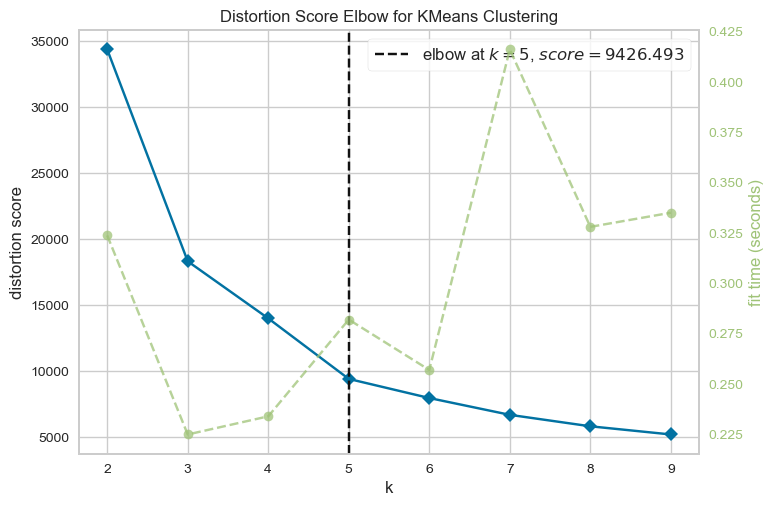

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
km = KMeans(n_init='auto')

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(dfk)
visualizer.show() 

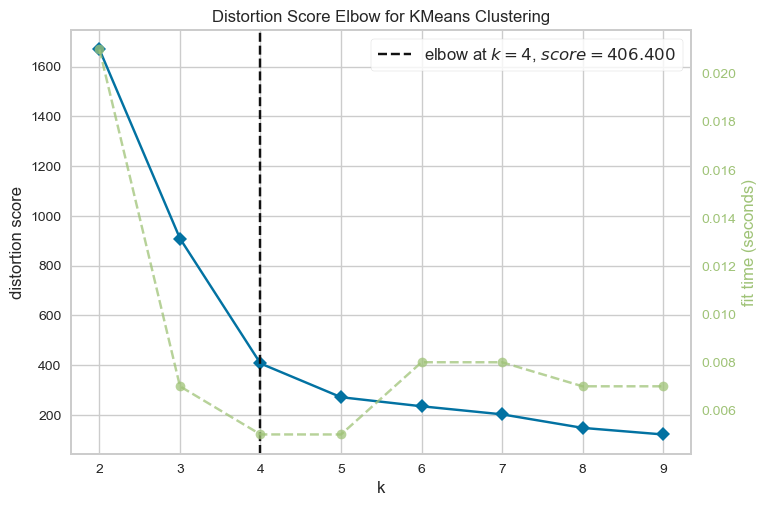

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Outliers

km = KMeans(n_init='auto')

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(dfk_outler)
visualizer.show() 

Silhouette Method

In [23]:
# from sklearn.metrics import silhouette_score

# for k in range(2, 6):
#     # Create a KMeans object and fit the data
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(dfk)

#     # Get the cluster labels for each sample
#     labels = kmeans.labels_

#     # Calculate silhouette score
#     silhouette_avg = silhouette_score(dfk, labels)

#     # Print the silhouette score
#     print(f"Silhouette Score k={k} : {silhouette_avg}" )

In [24]:
# # Outliers

# for k in range(2, 6):
#     # Create a KMeans object and fit the data
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(dfk_outler)

#     # Get the cluster labels for each sample
#     labels = kmeans.labels_

#     # Calculate silhouette score
#     silhouette_avg = silhouette_score(dfk_outler, labels)

#     # Print the silhouette score
#     print(f"Silhouette Score k={k} : {silhouette_avg}" )

In [25]:
raise Exception

Exception: 

# RESULTS

- KMeans

In [26]:
cl = KMeans(n_clusters=5, n_init = 'auto', random_state=0)

df['cluster'] = cl.fit(dfk).labels_
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,2,0.0,0.0,0.005,0.0,0.000,679000.0,0.0,0.0,4
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,3,0.0,0.0,0.007,0.0,0.000,159100.0,0.0,0.0,3
2,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.002,0.0,0.000,341000.0,0.0,0.0,3
3,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.002,0.0,0.000,189000.0,0.0,0.0,3
4,TCC4WQQRE1I,0.0,1459000.0,0.0,0.0,1459000.0,0.0,0.0,0.0,0.0,...,4,0.0,0.0,0.005,0.0,0.000,291800.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479097,TCCEQ43JRR0,3.0,338000.0,0.0,338000.0,338000.0,0.0,338000.0,0.0,0.0,...,1,0.0,1.0,0.004,0.0,0.004,169000.0,0.0,169000.0,3
479098,TCCEQ43QW15,3.0,149000.0,0.0,149000.0,149000.0,0.0,149000.0,0.0,0.0,...,1,0.0,1.0,0.002,0.0,0.002,149000.0,0.0,149000.0,3
479099,TCCE4E4EE42,3.0,50000.0,0.0,50000.0,0.0,0.0,0.0,50000.0,0.0,...,1,0.0,1.0,0.002,0.0,0.002,50000.0,0.0,50000.0,3
479100,TCCEQ43REQY,3.0,50000.0,0.0,50000.0,0.0,0.0,0.0,50000.0,0.0,...,1,0.0,1.0,0.002,0.0,0.002,50000.0,0.0,50000.0,3


In [27]:
# Outliers

cl = KMeans(n_clusters=4, n_init = 'auto', random_state=0)

df2['cluster'] = cl.fit(dfk_outler).labels_
df2

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster
48,TCC4J3JQZ1I,38.0,10416000.0,0.0,787000.0,10416000.0,0.0,787000.0,0.0,0.0,...,10,0.0,1.0,0.023,0.0,0.004,548210.526,0.0,393500.000,1
815,TCC4Q1WEZRI,34.0,6238000.0,0.0,728000.0,0.0,0.0,0.0,6238000.0,0.0,...,4,0.0,1.0,0.014,0.0,0.004,445571.429,0.0,364000.000,3
1551,TCC4JQJ1RJK,39.0,11020000.0,0.0,1175000.0,9215000.0,0.0,1175000.0,1805000.0,0.0,...,12,0.0,1.0,0.011,0.0,0.004,459166.667,0.0,391666.667,1
2158,TCC4W34ZZZI,0.0,6855000.0,0.0,700000.0,3926000.0,0.0,700000.0,2929000.0,0.0,...,11,0.0,1.0,0.023,0.0,0.004,380833.333,0.0,350000.000,1
2390,TCC4WW1CWRU,32.0,14613000.0,0.0,1262000.0,8645000.0,0.0,1262000.0,5968000.0,0.0,...,14,0.0,1.0,0.012,0.0,0.002,584520.000,0.0,1262000.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565498,TCCEQ43JQQ0,3.0,1589000.0,0.0,1589000.0,0.0,0.0,0.0,1589000.0,0.0,...,1,0.0,1.0,0.002,0.0,0.002,1589000.000,0.0,1589000.000,2
565502,TCCEJ3J3E32,6.0,1589000.0,0.0,1589000.0,0.0,0.0,0.0,1589000.0,0.0,...,1,0.0,1.0,0.002,0.0,0.002,1589000.000,0.0,1589000.000,2
565515,TCCE44RR437,3.0,1639000.0,0.0,1639000.0,0.0,0.0,0.0,1639000.0,0.0,...,2,0.0,2.0,0.004,0.0,0.004,819500.000,0.0,819500.000,3
565555,TCCEQ43RJEK,3.0,1659000.0,0.0,1659000.0,1659000.0,0.0,1659000.0,0.0,0.0,...,1,0.0,1.0,0.004,0.0,0.004,829500.000,0.0,829500.000,1


In [28]:
# df.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_segment_result.csv')
# df2.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_outlier_result.csv')

# for MacOS
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_segment_result.csv')
# df2.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_outlier_result.csv')

- Feature Importance

Feature: 0, Score: 0.13537
Feature: 1, Score: 0.07351
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00131
Feature: 4, Score: 0.00292
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00056
Feature: 7, Score: 0.00778
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00012
Feature: 10, Score: 0.01285
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.08863
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00045
Feature: 16, Score: 0.29126
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00064
Feature: 19, Score: 0.38421
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00039


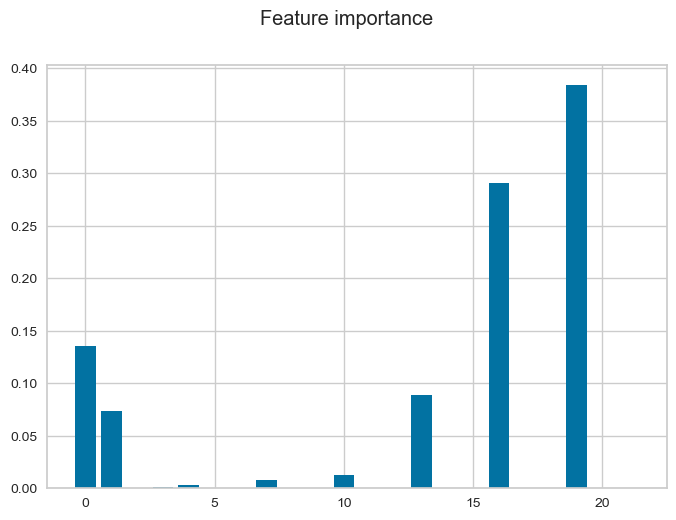

In [30]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeClassifier

# define dataset
X = df.drop(columns=['ent','cluster'])
y = df['cluster']

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.suptitle("Feature importance")
plt.show()

In [31]:
print(f"Feature columns : {X.columns[19]} , {X.columns[16]}")


Feature columns : ticket_size , sku_penetrate(%)


Feature: 0, Score: 0.00309
Feature: 1, Score: 0.00653
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00279
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00483
Feature: 7, Score: 0.00163
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.63749
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00608
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.33175
Feature: 19, Score: 0.00581
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000


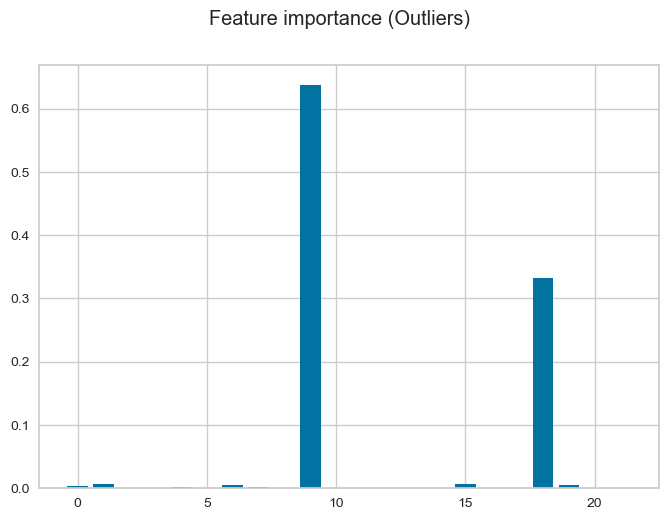

In [33]:
# Outliers

# define dataset
X = df2.drop(columns=['ent','cluster'])
y = df2['cluster']

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.suptitle("Feature importance (Outliers)")
plt.show()

In [ ]:
print(f"Feature columns (Outliers) : {X.columns[9]} , {X.columns[18]}")

Feature columns (Outliers) : total_last_6m_offline , sku_last6m


PLOT (KMeans)

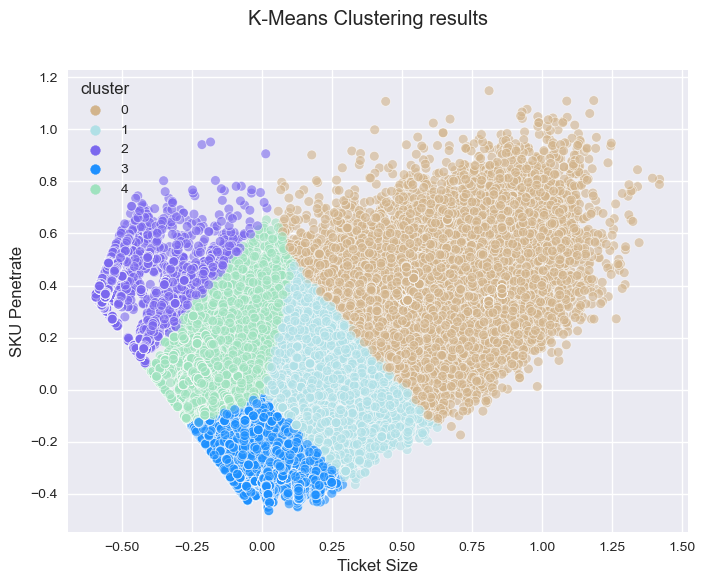

In [34]:
# Getting unique labels
 
dfk['cluster'] = df['cluster']
 
# plotting the results:
 
plt.style.use('seaborn-v0_8')

fig, axe = plt.subplots(figsize=(8,6))

color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                  2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF'})

g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.6, palette=color_dict)
axe.set(xlabel='Ticket Size', ylabel='SKU Penetrate')
fig.suptitle("K-Means Clustering results")
plt.show()

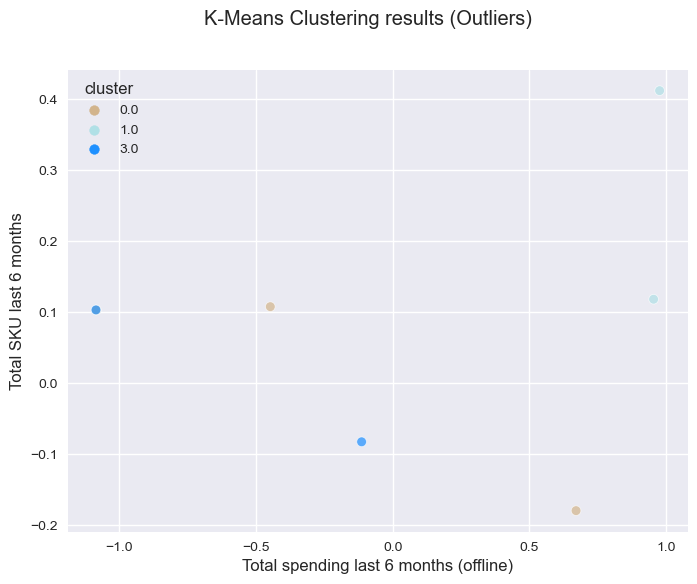

In [35]:
# Getting unique labels
 
dfk_outler['cluster'] = df2['cluster']
 
# plotting the results:
 
plt.style.use('seaborn-v0_8')

fig, axe = plt.subplots(figsize=(8,6))

color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                  2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF'})

g = sns.scatterplot(data = dfk_outler , x=0, y=1, hue="cluster", ax=axe ,alpha=0.7, palette=color_dict)
axe.set(xlabel='Total spending last 6 months (offline)', ylabel='Total SKU last 6 months')
fig.suptitle("K-Means Clustering results (Outliers)")
plt.show()